## Checking data architecture

In [1]:
from pathlib import Path
from glob import glob
import pickle
import matplotlib.pyplot as plt
from ravens.utils import utils
import numpy as np
from ravens.utils import utils
0.39907507]]


import cv2
import numpy as np
import os

2022-06-28 15:08:25.216219: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
pybullet build time: May 20 2022 19:43:01


## Calibration of SimCameras

In [2]:
cam_config=[{'image_size': (480, 640), 
             'intrinsics': (450.0, 0, 320.0,
                            0, 450.0, 240.0,
                            0, 0, 1), 
             'position': (1.0, 0, 0.75), 
             'rotation': (0.6532814824381883, 0.6532814824381884, 
                          -0.2705980500730986, -0.27059805007309845), 
             'zrange': (0.01, 10.0), 'noise': False}, 
            {'image_size': (480, 640), 
             'intrinsics': (450.0, 0, 320.0, 0, 450.0, 240.0, 0, 0, 1), 
             'position': (0, 0.5, 0.75), 
             'rotation': (-0.3596047974904982, 0.8681627791959909, 
                          -0.3159854101251621, 0.1308854423858669), 
             'zrange': (0.01, 10.0), 
             'noise': False}, 
            {'image_size': (480, 640), 
             'intrinsics': (450.0, 0, 320.0, 0, 450.0, 240.0, 0, 0, 1), 
             'position': (0, -0.5, 0.75), 
             'rotation': (-0.8681627791959909, 0.3596047974904982, 
                          -0.13088544238586683, 0.3159854101251621), 
             'zrange': (0.01, 10.0), 
             'noise': False}]
bounds = np.array([[ 0.25,  0.75],
       [-0.5 ,  0.5 ],
       [ 0.  ,  0.28]])
pix_size = 0.003125

In [ ]:
idx = 2

## Read AzureKinect Images

In [ ]:
Config?

In [ ]:
cnt = connected_device_count()

In [ ]:
k4a = PyK4A(
        device_id=0,
        config=Config(
            color_resolution=config.ColorResolution.RES_720P,
            color_format=config.ImageFormat.COLOR_BGRA32,
            camera_fps=config.FPS.FPS_15,
            depth_mode=config.DepthMode.WFOV_UNBINNED,
        )
    )
k4a.start()
capture = k4a.get_capture()

In [ ]:
k4a.stop()

In [ ]:
capture = k4a.get_capture()

In [ ]:
plt.subplots(figsize=(20,20))
plt.imshow(capture.color[50:450,400:920,:3])
plt.imshow(capture.transformed_depth[50:450,400:920], alpha=0.8, cmap="magma")

## Calibrate Camera

In [ ]:
camera_folder = "camera_0"

In [ ]:
CHECKERBOARD = (7,10)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objpoints = []
imgpoints = [] 
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
images = glob('./'+camera_folder+'/*.png')
loaded_imgs =[]

In [ ]:
images, len(images)

In [ ]:
orig_id = np.where(np.array([name.find("orig") for name in images]) > -1)[0][0]
orig_id

In [ ]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)     
    if ret == True:
        objpoints.append(objp)
        
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        imgpoints.append(corners2)
        
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    loaded_imgs.append(img)

In [ ]:
f,ax = plt.subplots(figsize=(30,60), nrows=int(len(images)/2)+1,ncols=2)
ax = ax.flatten()
for idx in range(len(images)):
    ax[idx].set_title(str(idx))
    ax[idx].imshow(cv2.cvtColor(loaded_imgs[idx],cv2.COLOR_BGR2RGB))

In [ ]:
rec, intrinsic, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [ ]:
rotation3_1= rvecs[orig_id]
rotation3_3,_=cv2.Rodrigues(rotation3_1)
translation= tvecs[orig_id]
print("intrinsic")
print(intrinsic)
print("rotation")
print(rotation3_3)
print("translation")
print(translation)

In [ ]:
np.save("intrinsic_"+camera_folder+".npy",intrinsic)
np.save("rotation_"+camera_folder+".npy",rotation3_3)
np.save("translation_"+camera_folder+".npy",translation)

In [ ]:
imgpoints2 = np.squeeze(imgpoints2)

In [ ]:
np.array([[[0.0,0.0,0.0]]]).shape

In [ ]:
imgpoints2.shape

In [ ]:
imgpoints2, _ = cv2.projectPoints(np.array([[[-1,-1,0.0]]]), rvecs[orig_id], tvecs[orig_id], intrinsic, dist)
imgpoints2 = np.squeeze(imgpoints2)
orig_image = cv2.cvtColor(cv2.imread(images[orig_id]), cv2.COLOR_BGR2RGB)
#cv2.circle(orig_image,(0,0),4,(255,0,0))

#for point in imgpoints2:
cv2.circle(orig_image,imgpoints2.astype(int),4,(255,0,0))

plt.subplots(figsize=(20,20))
plt.imshow(orig_image)    

In [ ]:
images

cv2.projectPoints(objpoints[orig_id], rvecs[orig_id], tvecs[orig_id], mtx, dist)

In [ ]:
imgpoints2, _ = cv2.projectPoints(objpoints[orig_id], rvecs[orig_id], tvecs[orig_id], intrinsic, dist)

# Generate TableTop from Sim FilesFiles0

## 1. Setup files

In [3]:
ravens_path=Path("/home/robo/ravens")
task_path=Path(ravens_path/"block-insertion-train")
color_path = task_path/"color"
depth_path= task_path/"depth"
action_path= task_path/"action"
info_path= task_path/"info"
reward_path= task_path/"reward"

color_files=glob(str(color_path/"*.pkl"))
depth_files=glob(str(depth_path/"*.pkl"))
action_files=glob(str(action_path/"*.pkl"))
info_files=glob(str(info_path/"*.pkl"))
reward_files=glob(str(reward_path/"*.pkl"))

## Index for sample

In [4]:
idx = 2

## 2. Color Images

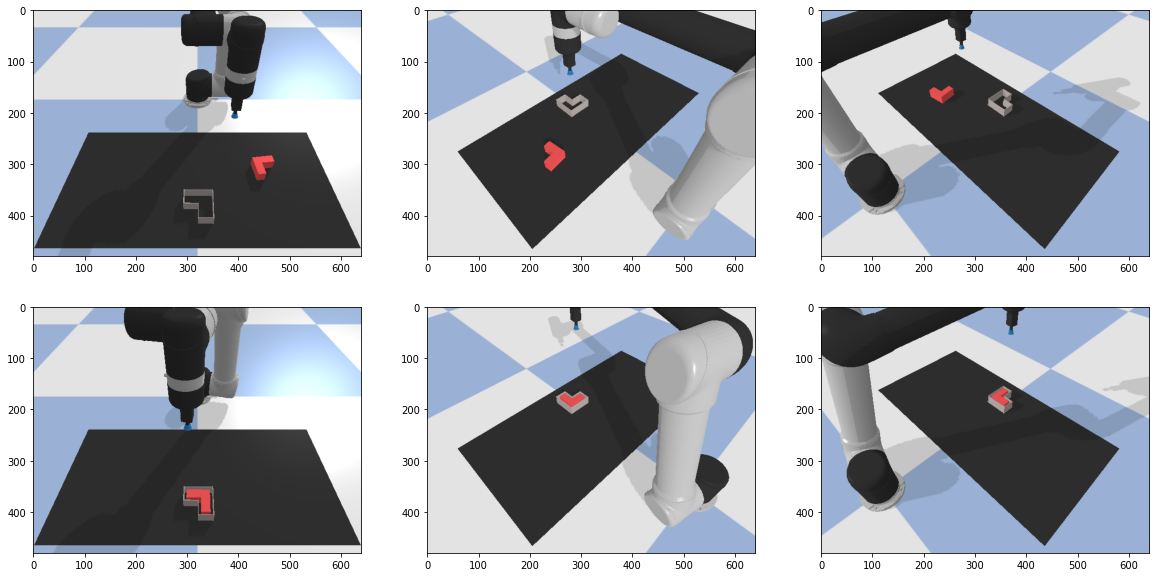

In [5]:
image = pickle.load(open(color_files[idx],"rb"))
f,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))
ax = ax.flatten()
ax[0].imshow(image[0,0]) 
ax[1].imshow(image[0,1]) 
ax[2].imshow(image[0,2]) 
ax[3].imshow(image[1,0]) 
ax[4].imshow(image[1,1]) 
ax[5].imshow(image[1,2]) 

## 3. Depth Images

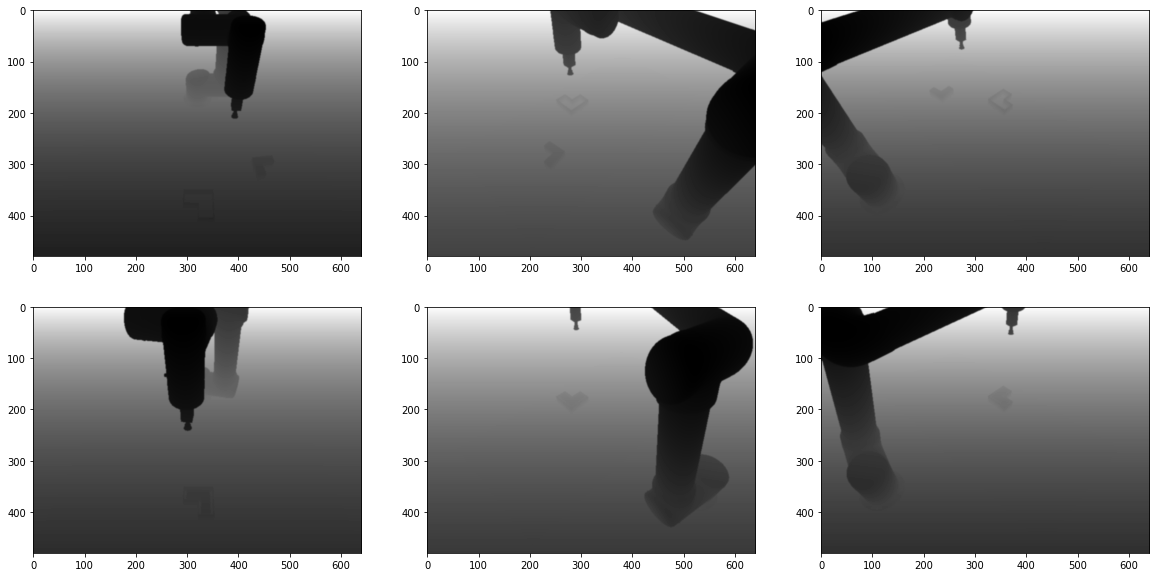

In [6]:
depth = pickle.load(open(depth_files[idx],"rb"))
f,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))
ax = ax.flatten()
ax[0].imshow(depth[0,0], cmap="gray", interpolation="bicubic") 
ax[1].imshow(depth[0,1], cmap="gray", interpolation="bicubic") 
ax[2].imshow(depth[0,2], cmap="gray", interpolation="bicubic") 
ax[3].imshow(depth[1,0], cmap="gray", interpolation="bicubic") 
ax[4].imshow(depth[1,1], cmap="gray", interpolation="bicubic") 
ax[5].imshow(depth[1,2], cmap="gray", interpolation="bicubic") 

## Generate Table Top From Color and Depth map

In [ ]:
depth[0][0].max()

In [ ]:
bounds

In [ ]:
image[0].shape

In [9]:
image[0][0][None].shape

(1, 480, 640, 3)

(320, 160, 3) (320, 160)


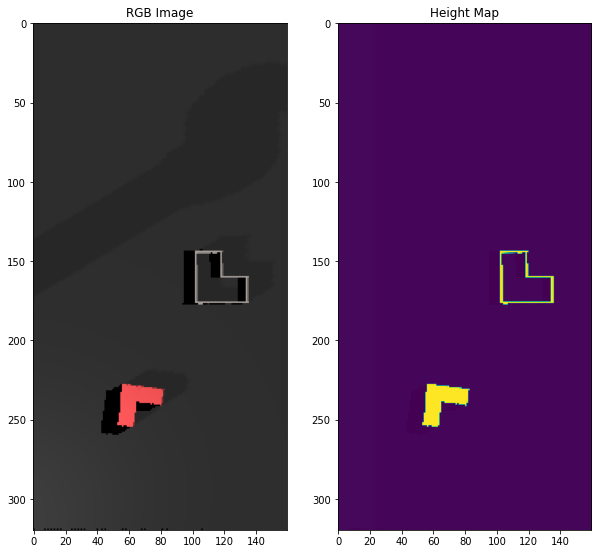

In [7]:
obs = {"color":image[0][0][None], "depth":depth[0][0][None]}
#obs = {"color":image[0], "depth":depth[0]}
cmap, hmap = utils.get_fused_heightmap(obs, cam_config, bounds, pix_size)
print(cmap.shape, hmap.shape)
f,ax = plt.subplots(figsize=(10,10),ncols=2,nrows=1)
ax[0].imshow(cmap)
ax[0].set_title("RGB Image")
ax[1].set_title("Height Map")
ax[1].imshow(hmap)

## 4. Actions

In [ ]:
action = pickle.load(open(action_files[idx],"rb"))[0]
action

## 5. Infos

In [ ]:
info = pickle.load(open(info_files[idx],"rb"))
info

## 6. Rewards

In [ ]:
reward = pickle.load(open(reward_files[idx],"rb"))
reward

# Generate TableTop from Real Files

## Load Camera Calibration

In [ ]:
intrinsic_camera_1 = np.load("intrinsic_camera_1.npy")
rotation_camera_1 = np.load("rotation_camera_1.npy")
translation_camera_1 = np.load("translation_camera_1.npy")

intrinsic_camera_0 = np.load("intrinsic_camera_0.npy")
rotation_camera_0 = np.load("rotation_camera_0.npy")
translation_camera_0 = np.load("translation_camera_0.npy")

## Get Image from kinect

In [ ]:
image_camera_0 = cv2.cvtColor(cv2.imread("camera_0.png"),cv2.COLOR_BGR2RGB)
image_camera_1 = cv2.cvtColor(cv2.imread("camera_1.png"),cv2.COLOR_BGR2RGB)

In [ ]:
f,ax = plt.subplots(figsize=(20,10),ncols=2,nrows=1)
ax = ax.flatten()
ax[0].imshow(image_camera_0)
ax[1].imshow(image_camera_0)

## Get image end depth from kinect

In [ ]:
images = []
depths = []
for device_id in [0,1]:
    k4a = PyK4A(
            device_id=device_id,
            config=Config(
                color_resolution=config.ColorResolution.RES_720P,
                color_format=config.ImageFormat.COLOR_BGRA32,
                camera_fps=config.FPS.FPS_15,
                depth_mode=config.DepthMode.WFOV_UNBINNED,
            )
        )
    k4a.start()
    capture = k4a.get_capture()
    images.append(cv2.cvtColor(capture.color[:,:,:3],cv2.COLOR_BGR2RGB))
    depths.append(capture.transformed_depth)
    k4a.stop()

In [ ]:
np.array(images).shape, np.array(depths).shape

In [ ]:
f,ax = plt.subplots(figsize=(20,20),ncols=2,nrows=4)
ax = ax.flatten()
ax[0].imshow(images[0])
ax[1].imshow(depths[0])
ax[2].imshow(images[0][200:500,400:900])
ax[3].imshow(depths[0][200:500,400:900])

ax[4].imshow(images[1])
ax[5].imshow(depths[1])
ax[6].imshow(images[1][270:570,300:900])
ax[7].imshow(depths[1][270:570,300:900])

## Define Camera Matricespoints

In [ ]:
cam_config_real = [{"image_size":np.array(images)[0].shape[:2],
                   "intrinsics":intrinsic_camera_0,
                   "position":translation_camera_0,
                   "rotation":rotation_camera_0},
                  {"image_size":np.array(images)[1].shape[:2],
                   "intrinsics":intrinsic_camera_1,
                   "position":translation_camera_1,
                   "rotation":rotation_camera_1}]

In [ ]:
images[0].shape

In [ ]:
depths[0]/1000

In [ ]:

data = {"color":np.array(images), "depth":np.array(depths)}
cmap, hmap = utils.get_fused_heightmap(data, cam_config_real, real_bounds, pix_size, 
                                       reshape_translation=False, reshape_intrinsics=False,
                                       reshape_rotation=False)
print(cmap.shape, hmap.shape)
f,ax = plt.subplots(figsize=(10,10),ncols=2,nrows=1)
ax[0].imshow(cmap)
ax[0].set_title("RGB Image")
ax[1].set_title("Height Map")
ax[1].imshow(hmap)

In [ ]:
depths[0].shape

In [ ]:
cam_config_real[0]["intrinsics"]

In [ ]:
real_bounds = np.array([[-80.0,200.0],
          [123.0, 580.0],
          [257.0,668.0]])

In [ ]:
cam_config_real[cam_idx]["position"]

In [ ]:
cam_idx=1

In [ ]:
cam_idx=1
points = utils.get_pointcloud(depths[cam_idx], cam_config_real[cam_idx]["intrinsics"])
transform = np.eye(4)
transform[:3, :] = np.hstack((cam_config_real[cam_idx]["rotation"], cam_config_real[cam_idx]["position"]))
points = utils.transform_pointcloud(points, transform)

ix = (points[Ellipsis, 0] >= real_bounds[0, 0]) & (points[Ellipsis, 0] < real_bounds[0, 1])
iy = (points[Ellipsis, 1] >= real_bounds[1, 0]) & (points[Ellipsis, 1] < real_bounds[1, 1])
iz = (points[Ellipsis, 2] >= real_bounds[2, 0]) & (points[Ellipsis, 2] < real_bounds[2, 1])
valid = ix & iy & iz

plt.imshow(valid)
plt.imshow(images[0], alpha=0.5)
plt.show()

In [ ]:
points = points[valid]



In [ ]:
colors = colors[valid]

In [ ]:
depths[0].max()

In [ ]:
f,ax = plt.subplots(figsize=(20,20),nrows=1,ncols=3)
ax = ax.flatten()
ax[0].imshow(points[:,:,0],cmap="magma")
ax[0].set_title("X")
ax[1].imshow(points[:,:,1],cmap="magma")
ax[1].set_title("Y")
ax[2].imshow(points[:,:,2][200:500,400:900],cmap="magma")
ax[2].set_title("Z")
plt.show()

In [ ]:
points[:,:,0][200:500,400:900].min(), points[:,:,0][200:500,400:900].max()

In [ ]:
points[:,:,1][200:500,400:900].min(), points[:,:,1][200:500,400:900].max()

In [ ]:
points[:,:,2][200:500,400:900].min(), points[:,:,2][200:500,400:900].max()

In [ ]:
real_bounds = np.array([[0.0,200.0],
          [120.0, 580.0],
          [257.0,668.0]])